In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [7]:
# Data colllection and processing

# loading the csv data to pandas DataFrame
gold_data = pd.read_csv(r'C:\Users\DARSHAN\gld_price_data.csv')

In [13]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [27]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [28]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [29]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [30]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [31]:
# statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [20]:
numeric_data = gold_data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()

<Axes: >

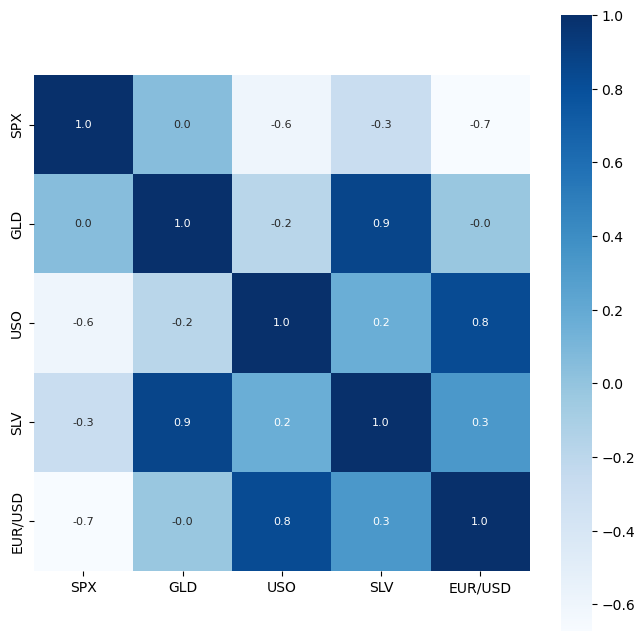

In [22]:
 # constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [23]:
 # correlation value of GLD
print(correlation['GLD'])    

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\DARSHAN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


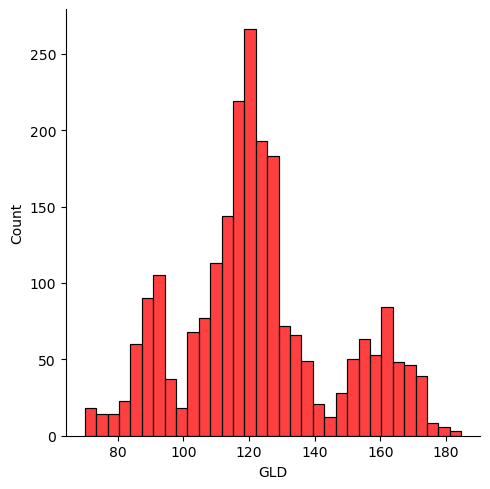

In [26]:
#checking the distribution of GLD price
sns.displot(gold_data['GLD'],color='red')

In [32]:
# spliting the features and targets
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [33]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [34]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [36]:
#model training
regressor = RandomForestRegressor(n_estimators=100)

In [37]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [38]:
#model evaluation
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [39]:
print(test_data_prediction)

[168.75859956  81.85109983 116.09130017 127.78040095 120.66400122
 154.73069778 150.07709879 126.22410066 117.50239858 125.872501
 116.59850098 171.01790068 141.69999838 167.59639886 115.09170003
 117.56730048 138.23800354 170.43190116 159.43220314 160.20669894
 155.15069998 125.21359992 175.57819956 156.8607027  125.22970028
  93.84789957  77.14600026 120.49989989 119.16299931 167.34299851
  88.10590052 125.20609995  91.25190048 117.74280027 121.02049914
 135.99730061 115.56100132 114.92420065 148.33709957 107.19620088
 104.5374024   87.05709782 126.41710073 117.76880014 153.79089875
 119.66419995 108.50360001 108.00219825  93.02400037 127.16709767
  75.37320025 113.66309918 121.43360012 111.14719947 118.89999902
 120.89099948 159.8205997  167.79610152 147.01409698  85.79959813
  94.31100025  86.91119927  90.71649993 118.98610087 126.46470077
 127.40169984 170.68729976 122.29289935 117.32409871  98.52300045
 168.70150166 142.98989845 132.48710247 121.16070222 120.68769939
 119.5937004

In [41]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9897801249604774


In [42]:
# Compare Actual and Predicted valuess in a Plot
Y_test = list(Y_test)

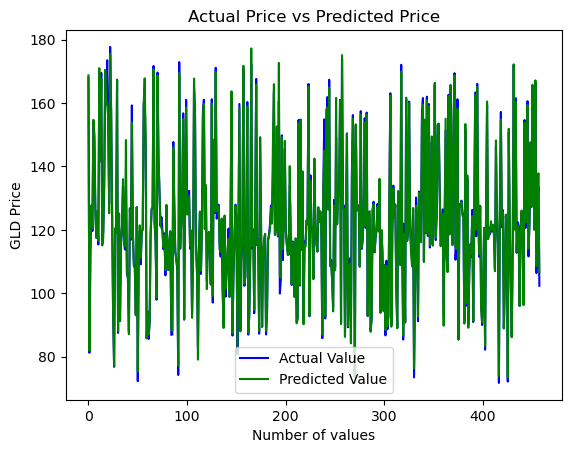

In [45]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()